In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


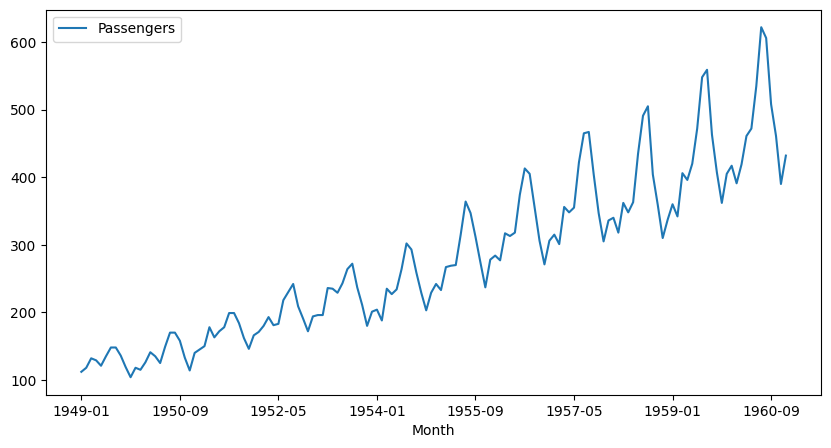

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Visualize the data
print(data.head())
data.plot(x='Month', y='Passengers', figsize=(10, 5))
plt.show()

# Preprocess the data

In [5]:
# Datetime formating
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Select features and target
features = ['Passengers']
target = 'Passengers'

# Normalize the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Convert to numpy arrays
X = data[features].values
y = data[target].values

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

#GRU model

Epoch 1/100
6/6 [==============================] - 6s 392ms/step - loss: 0.1124 - val_loss: 0.0205
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0246 - val_loss: 0.0331
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0251 - val_loss: 0.0128
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0145 - val_loss: 0.0176
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0158 - val_loss: 0.0128
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0126 - val_loss: 0.0110
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0122 - val_loss: 0.0104
Epoch 8/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 9/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 11/100
6/6 [

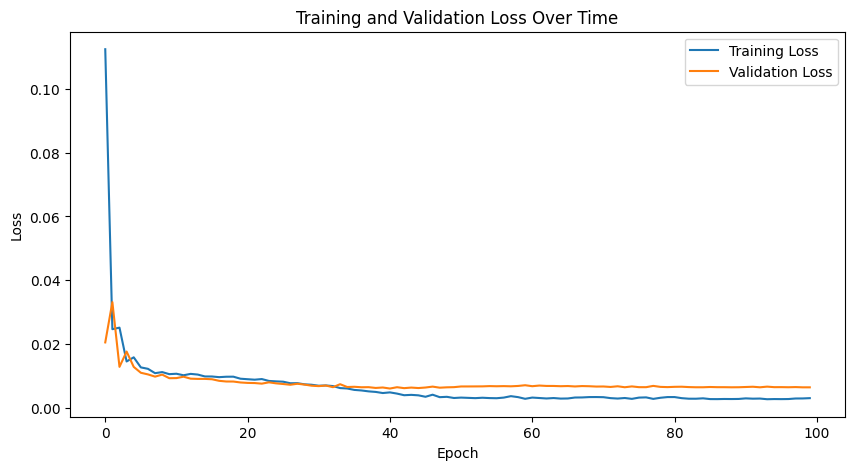

In [6]:
# Define the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(GRU(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Model evaluation

Test Loss: 0.0028
1/1 [==============================] - 1s 779ms/step


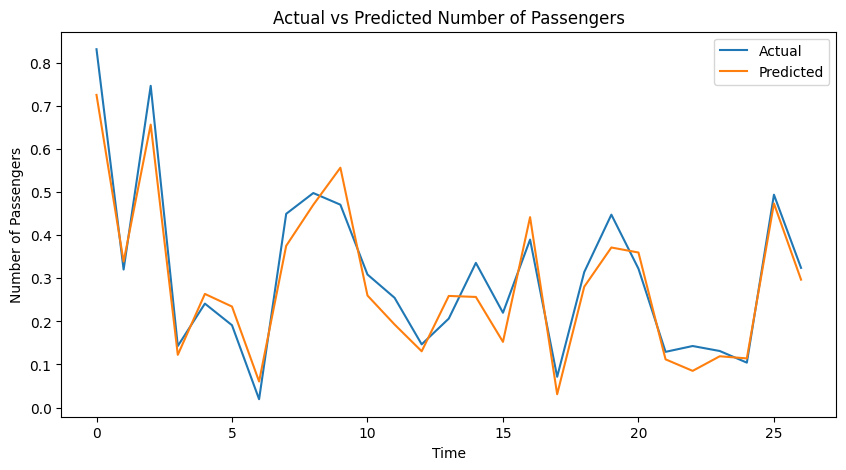

Mean Absolute Percentage Error (MAPE): 24.30%


In [7]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = target_scaler.inverse_transform(y_test_pred)

# Visualize the predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_test_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Passengers')
plt.legend()
plt.show()

# Calculate accuracy (e.g., Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_test_pred_inv)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# If you want to save the model

In [8]:
model.save('gru_airline_passengers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Full code

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


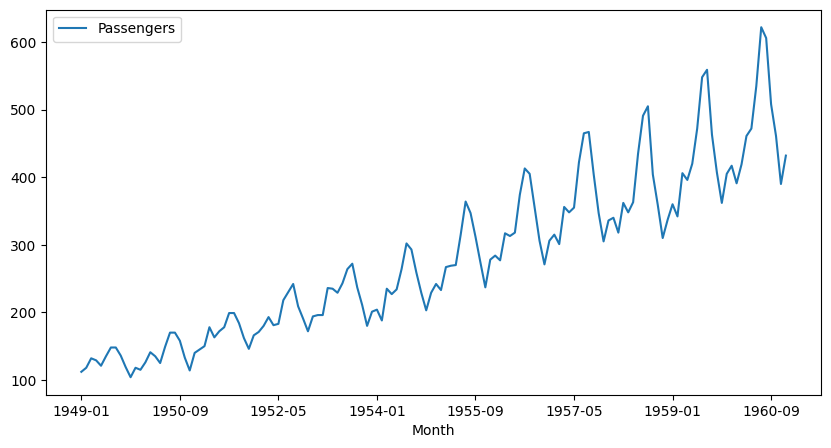

Epoch 1/100
6/6 [==============================] - 8s 189ms/step - loss: 0.1030 - val_loss: 0.0208
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0246 - val_loss: 0.0349
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0266 - val_loss: 0.0133
Epoch 4/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0153 - val_loss: 0.0189
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0165 - val_loss: 0.0130
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0120 - val_loss: 0.0104
Epoch 8/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0112 - val_loss: 0.0096
Epoch 9/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 10/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 11/100
6/6 [

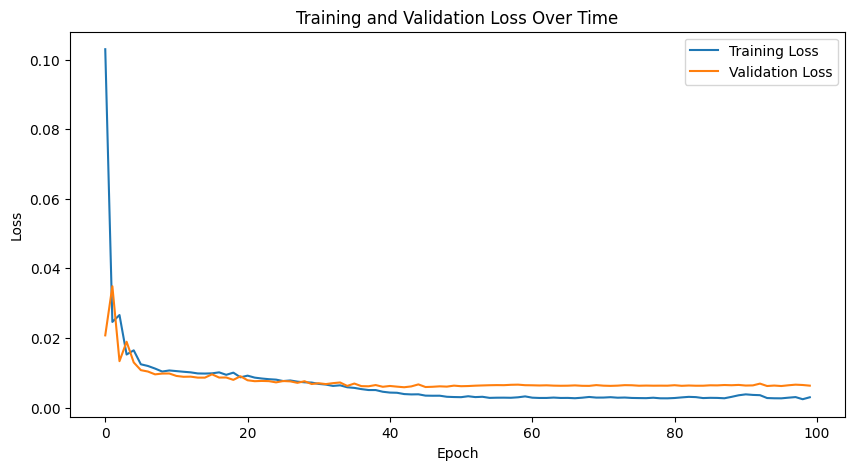

Test Loss: 0.0028
1/1 [==============================] - 1s 1s/step


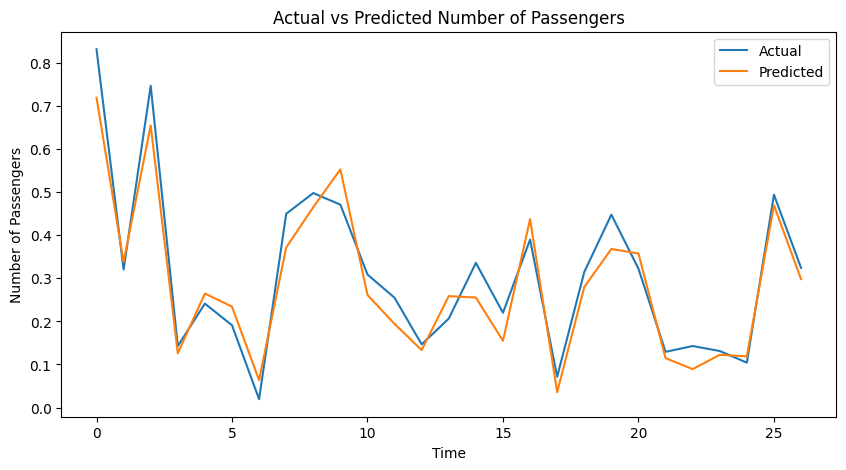

Mean Absolute Percentage Error (MAPE): 24.37%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# Load the data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Visualize the data
print(data.head())
data.plot(x='Month', y='Passengers', figsize=(10, 5))
plt.show()

# Preprocess the data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Select features and target
features = ['Passengers']
target = 'Passengers'

# Normalize the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Convert to numpy arrays
X = data[features].values
y = data[target].values

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(GRU(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = target_scaler.inverse_transform(y_test_pred)

# Visualize the predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_test_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Passengers')
plt.legend()
plt.show()

# Calculate accuracy (e.g., Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_test_pred_inv)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# If you want to save the model
model.save('gru_airline_passengers.h5')